<a href="https://colab.research.google.com/github/sompattanaik/Data-Science/blob/main/Decision_tree_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [79]:
data = pd.read_csv('iris.csv')
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [80]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

In [81]:
x= data.iloc[:,0:4]
y = data['Species']

In [82]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [83]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [84]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

**Split the data into training and testing**

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

**Build Decision Tree model**

In [86]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

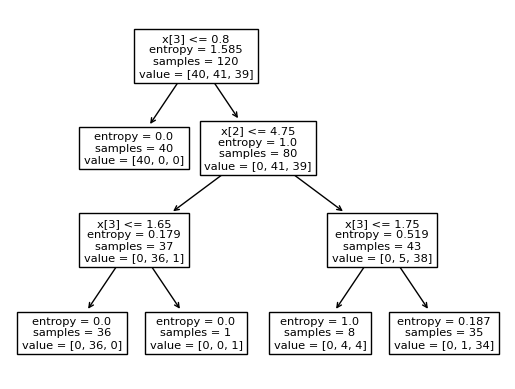

In [87]:
from sklearn import tree

tree.plot_tree(model);

In [88]:
data.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

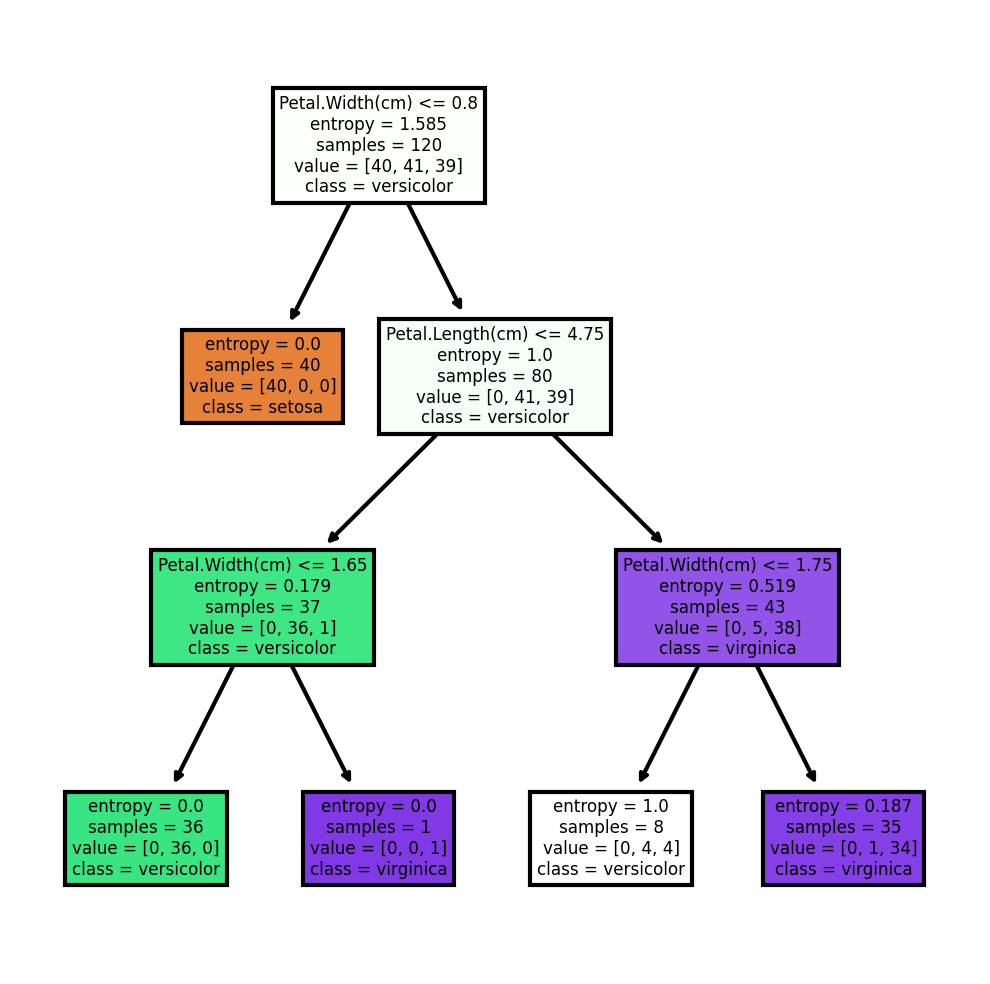

In [89]:
fn= ['Sepal.Length(cm)', 'Sepal.Width(cm)', 'Petal.Length(cm)', 'Petal.Width(cm)']
cn = ['setosa', 'versicolor', 'virginica']

fig,axes = plt.subplots(nrows=1,ncols=1,figsize = (4,4),dpi = 300)
tree.plot_tree(model,feature_names = fn, class_names = cn, filled = True);

In [90]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: 2
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



In [111]:
model.feature_importances_

array([0.        , 0.        , 0.29060681, 0.70939319])

In [92]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Petal.Width(cm)     0.709393
Petal.Length(cm)    0.290607
Sepal.Length(cm)    0.000000
Sepal.Width(cm)     0.000000
dtype: float64

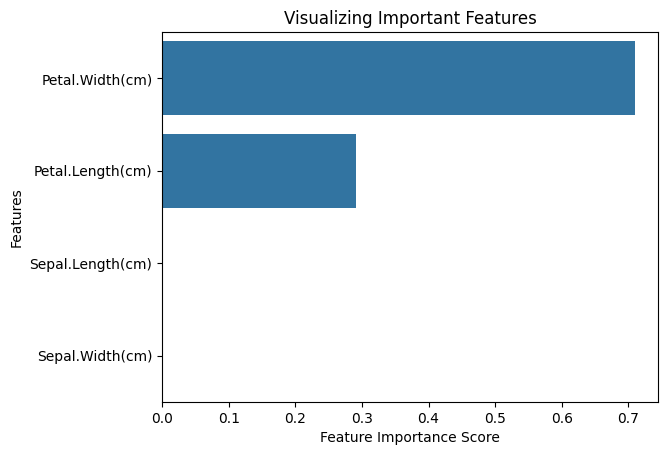

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [94]:
preds = model.predict(x_test)

In [95]:
pd.Series(preds).value_counts()

2    11
0    10
1     9
dtype: int64

In [96]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,10,0,0
1,0,9,0
2,0,0,11


In [97]:
# Accuracy
np.mean(preds==y_test)

1.0

# Decision Tree using CART- Gini Criteria

In [99]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)


In [100]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [103]:
pred_gini=model_gini.predict(x_test)

In [105]:
# Accuracy
np.mean(pred_gini == y_test)

1.0

In [109]:
model_gini.feature_importances_

array([0.        , 0.        , 0.39426873, 0.60573127])

# Decision tree in regressiion analysis

In [112]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [114]:
array = data.values
X = array[:,0:3]
y = array[:,3]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [116]:
model = DecisionTreeRegressor(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [118]:
#Find the testing accuracy
model.score(X_test,y_test)

0.9332802038697077

In [119]:
#Find the training accuracy
model.score(X_train, y_train)

0.9431340464432032